Notes

Name: Unless you have a well-defined dataset with historical prices for specific car models, using the name may not be practical.

Seller Type: While the seller type can influence the price, it might not be a primary factor, and including it may lead to overcomplicating the model.

# Project I ML 
### Yahia Ehab Mohamed 7037125
### Ahmed Shehata 7005537

## Data Preparation

In [79]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('Dataset_ML/Train.csv')
test_data = pd.read_csv('Dataset_ML/Test.csv')


## Data Exploration

In [80]:
#Change type of name , fuel , seller_type , transmission , owner to category
#to make it easier to convert to numerical values

train_data['fuel'] = train_data['fuel'].astype('category')
train_data['fuel'] = train_data['fuel'].cat.codes

train_data['transmission'] = train_data['transmission'].astype('category')
train_data['transmission'] = train_data['transmission'].cat.codes

train_data['owner'] = train_data['owner'].astype('category')
train_data['owner'] = train_data['owner'].cat.codes

train_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,1,Individual,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,Individual,1,2
2,Honda City 2017-2020 EXi,2006,158000,140000,3,Individual,1,4
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,Individual,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,Individual,1,0


In [81]:
#Change type of name , fuel , seller_type , transmission , owner to category
#to make it easier to convert to numerical values

test_data['fuel'] = test_data['fuel'].astype('category')
test_data['fuel'] = test_data['fuel'].cat.codes

test_data['transmission'] = test_data['transmission'].astype('category')
test_data['transmission'] = test_data['transmission'].cat.codes

test_data['owner'] = test_data['owner'].astype('category')
test_data['owner'] = test_data['owner'].cat.codes

test_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,Individual,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,Individual,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,Individual,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,1,2


### Explore Data Set

### Check For Missing Values

In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   int8  
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   int8  
 7   owner          8128 non-null   int8  
dtypes: int64(3), int8(3), object(2)
memory usage: 341.4+ KB


In [83]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int8  
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   int8  
 7   owner          4340 non-null   int8  
dtypes: int64(3), int8(3), object(2)
memory usage: 182.4+ KB


#### Drop Nan 

In [84]:
#Drop Nan values from train set
train_data.dropna(inplace=True)

#Drop Nan values from test set
test_data.dropna(inplace=True)

## Linear Regression

### Model Setup

#### Data Split

In [85]:
#Split the dataset into train and test set
x_train = train_data.drop(['selling_price','name','seller_type'], axis=1)
y_train = train_data['selling_price']

x_test = test_data.drop(['selling_price','name','seller_type'], axis=1)
y_test = test_data['selling_price']

x_train.head()

,year,km_driven,fuel,transmission,owner
0,2014,145500,1,1,0
1,2014,120000,1,1,2
2,2006,140000,3,1,4
3,2010,127000,1,1,0
4,2007,120000,3,1,0


### Multi-Feature Equation

#### Train

In [86]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

#Fit the model
model_LR.fit(x_train, y_train)

#Predict the test set
y_pred_LR = model_LR.predict(x_test)

#### Test

In [87]:
#Predict the train set
yPred_LR = model_LR.predict(x_test)

yPred_LR

array([-199818.71211168, -178275.5728287 ,  533087.49150299, ...,
       -155154.31534743,  728619.31616026,  248206.57059832])

#### Accuracy Comparison

In [88]:
#RMSE & MSE
from sklearn.metrics import mean_squared_error
mse_LR = mean_squared_error(y_test,yPred_LR)
rmse_LR = np.sqrt(mse_LR)
print("MSE: ",mse_LR)
print("RMSE: ",rmse_LR)

#MAE
from sklearn.metrics import mean_absolute_error
mae_LR = mean_absolute_error(y_test,yPred_LR)
print("MAE: ",mae_LR)

MSE:  218929406055.267
RMSE:  467898.9271790084
MAE:  312976.0537348316


#### Computation of Residual Error

0       259818.712112
1       313275.572829
2        66912.508497
3       -37933.692567
4       -97591.493271
            ...      
4335   -203299.068084
4336   -203299.068084
4337    265154.315347
4338    136380.683840
4339    -23206.570598
Name: selling_price, Length: 4340, dtype: float64


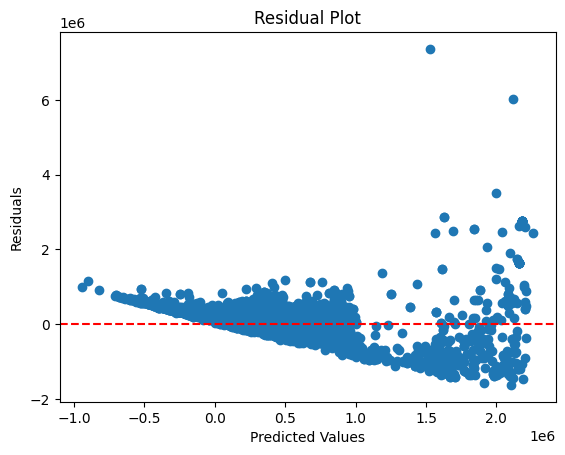

In [89]:
residuals_LR = y_test - yPred_LR

print(residuals_LR)

#Plot the residuals using residual plot
import matplotlib.pyplot as plt
plt.scatter(yPred_LR, residuals_LR)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### Gradient Descent

In [90]:
import numpy as np

# Generate some synthetic data for demonstration purposes
np.random.seed(0)
X = 2 * np.random.rand(100, 3)  # 100 data points with 3 features
y = 4 + np.dot(X, np.array([3, 2, 1])) + np.random.randn(100)

# Normalize the features (optional, but often recommended)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Initialize model parameters (weights and bias)
num_features = X.shape[1]
theta = np.random.randn(num_features)
bias = np.random.randn()

# Set hyperparameters
learning_rate = 0.01
num_epochs = 1000

# Define the cost function (mean squared error)
def cost_function(X, y, theta, bias):
    predictions = np.dot(X, theta) + bias
    error = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(error**2)
    return cost

# Gradient Descent
for epoch in range(num_epochs):
    # Compute predictions
    predictions = np.dot(X, theta) + bias
    
    # Compute the gradient for weights and bias
    dtheta = (1 / len(y)) * np.dot(X.T, (predictions - y))
    dbias = (1 / len(y)) * np.sum(predictions - y)
    
    # Update model parameters
    theta -= learning_rate * dtheta
    bias -= learning_rate * dbias
    
    # Calculate and print the cost for monitoring
    cost = cost_function(X, y, theta, bias)
    print(f"Epoch {epoch+1}, Cost: {cost}")

print("Final Weights (theta):", theta)
print("Final Bias (bias):", bias)



Epoch 1, Cost: 43.00191207270567
Epoch 2, Cost: 42.14381442471295
Epoch 3, Cost: 41.303051423254075
Epoch 4, Cost: 40.4792720388863
Epoch 5, Cost: 39.6721323697983
Epoch 6, Cost: 38.88129549664777
Epoch 7, Cost: 38.1064313403654
Epoch 8, Cost: 37.34721652286421
Epoch 9, Cost: 36.603334230594875
Epoch 10, Cost: 35.87447408088843
Epoch 11, Cost: 35.16033199102942
Epoch 12, Cost: 34.46061005000337
Epoch 13, Cost: 33.77501639286377
Epoch 14, Cost: 33.10326507766503
Epoch 15, Cost: 32.44507596490853
Epoch 16, Cost: 31.800174599450504
Epoch 17, Cost: 31.168292094821172
Epoch 18, Cost: 30.549165019905768
Epoch 19, Cost: 29.942535287939055
Epoch 20, Cost: 29.348150047765877
Epoch 21, Cost: 28.76576157732136
Epoch 22, Cost: 28.19512717928536
Epoch 23, Cost: 27.636009078866465
Epoch 24, Cost: 27.088174323672074
Epoch 25, Cost: 26.5513946856218
Epoch 26, Cost: 26.025446564862214
Epoch 27, Cost: 25.510110895642207
Epoch 28, Cost: 25.005173054108553
Epoch 29, Cost: 24.51042276798259
Epoch 30, Cost:

#### Accuracy Comparison

In [91]:

#RMSE & MSE
from sklearn.metrics import mean_squared_error
mse_LR = mean_squared_error(y_test,yPred_LR)
rmse_LR = np.sqrt(mse_LR)
print("MSE: ",mse_LR)
print("RMSE: ",rmse_LR)

#MAE
from sklearn.metrics import mean_absolute_error
mae_LR = mean_absolute_error(y_test,yPred_LR)
print("MAE: ",mae_LR)

MSE:  218929406055.267
RMSE:  467898.9271790084
MAE:  312976.0537348316


#### Computation of Residual Error

0       259818.712112
1       313275.572829
2        66912.508497
3       -37933.692567
4       -97591.493271
            ...      
4335   -203299.068084
4336   -203299.068084
4337    265154.315347
4338    136380.683840
4339    -23206.570598
Name: selling_price, Length: 4340, dtype: float64


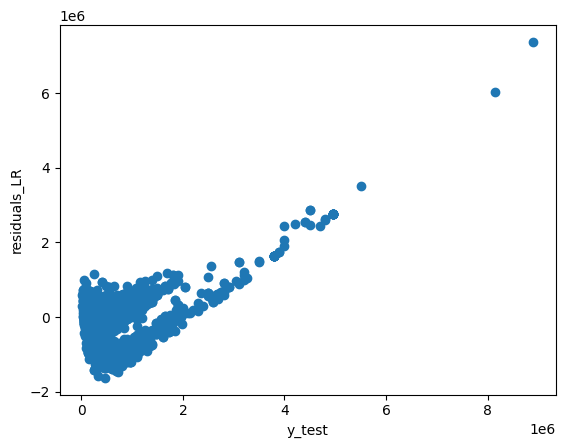

In [92]:
residuals_LR = y_test - yPred_LR

print(residuals_LR)

#Plot the residuals
import matplotlib.pyplot as plt
plt.scatter(y_test,residuals_LR)
plt.xlabel("y_test")
plt.ylabel("residuals_LR")
plt.show()

## Polynomial Regression

RMSE for degree 1 is 467898.9271789069
RMSE for degree 2 is 543054.5041619556
RMSE for degree 3 is 560297.8982231864
RMSE for degree 4 is 992469.114076917


RMSE for degree 5 is 3285968.9234963856
RMSE for degree 6 is 1875406.356411397
RMSE for degree 7 is 2388888.330965272
RMSE for degree 8 is 1023181.3921721822
RMSE for degree 9 is 66647542.532524005
RMSE for degree 10 is 23668333.787344817


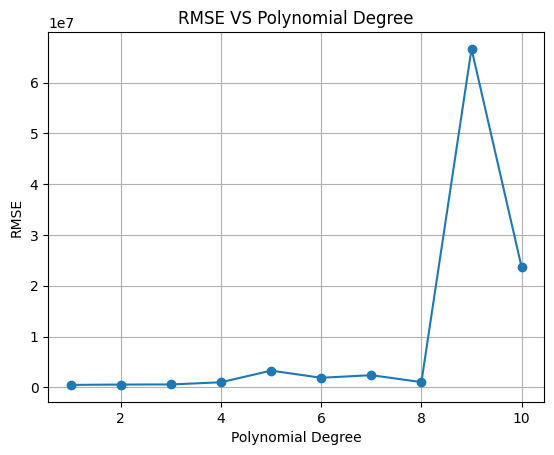

In [93]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


rmse_Values = [] #List to store the RMSE values for different degree of polynomial
degrees = list(range(1, 11)) #List to store the degree of polynomial

for i in range(1,11):
    poly_features = PolynomialFeatures(degree=i) #Create a PolynomialFeatures object of degree i
    X_train_poly = poly_features.fit_transform(x_train) #Transform the training set
    X_test_poly = poly_features.transform(x_test) #Transform the test set
    poly_model = LinearRegression() #Create a LinearRegression object
    poly_model.fit(X_train_poly, y_train) #Fit the model on the training set
    y_pred_poly = poly_model.predict(X_test_poly) #Predict the test set
    rmse = np.sqrt(mean_squared_error(y_test,y_pred_poly)) #Calculate the RMSE value
    rmse_Values.append(rmse) #Append the RMSE value to the list
    print("RMSE for degree "+str(i)+" is "+str(rmse)) #Print the RMSE value

#Change list to array to plot the values
rmse_Values = np.array(rmse_Values)
degrees = np.array(degrees)


#Plotting the RMSE values with degree
import matplotlib.pyplot as plt
plt.figure() #Create a new figure
plt.plot(degrees,rmse_Values,marker='o') #Plot the RMSE values
plt.title('RMSE VS Polynomial Degree') #Set the title of the plot
plt.xlabel('Polynomial Degree') #Set the x label of the plot
plt.ylabel('RMSE') #Set the y label of the plot
plt.grid(True) #Set the grid for the plot
plt.show() #Display the plot

#### Computation of Residual Error

0      -585938.152050
1      -511125.463106
2       -43869.064207
3      -396134.731247
4      -176579.155100
            ...      
4335   -235631.818748
4336   -235631.818748
4337   -535515.273266
4338    220001.171038
4339   -421142.490056
Name: selling_price, Length: 4340, dtype: float64


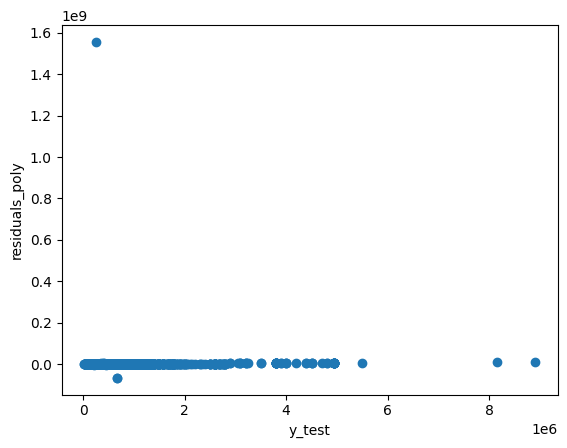

In [94]:
residuals_poly = y_test - y_pred_poly

print(residuals_poly)

#Plot of residuals
import matplotlib.pyplot as plt
plt.scatter(y_test,residuals_poly)
plt.xlabel("y_test")
plt.ylabel("residuals_poly")
plt.show()